In [1]:
!pip install pyreadr
!pip install cufflinks

You should consider upgrading via the 'c:\users\chait\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\chait\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import cufflinks as cf
import matplotlib.pyplot as plt
import plotly.offline as plyo
plyo.init_notebook_mode(connected=True)

In [3]:
import pyreadr

result = pyreadr.read_r('stocks.rds') # also works for RData
df = result[None] 

In [4]:
import pandas as pd
df=pd.DataFrame(df)

<AxesSubplot:>

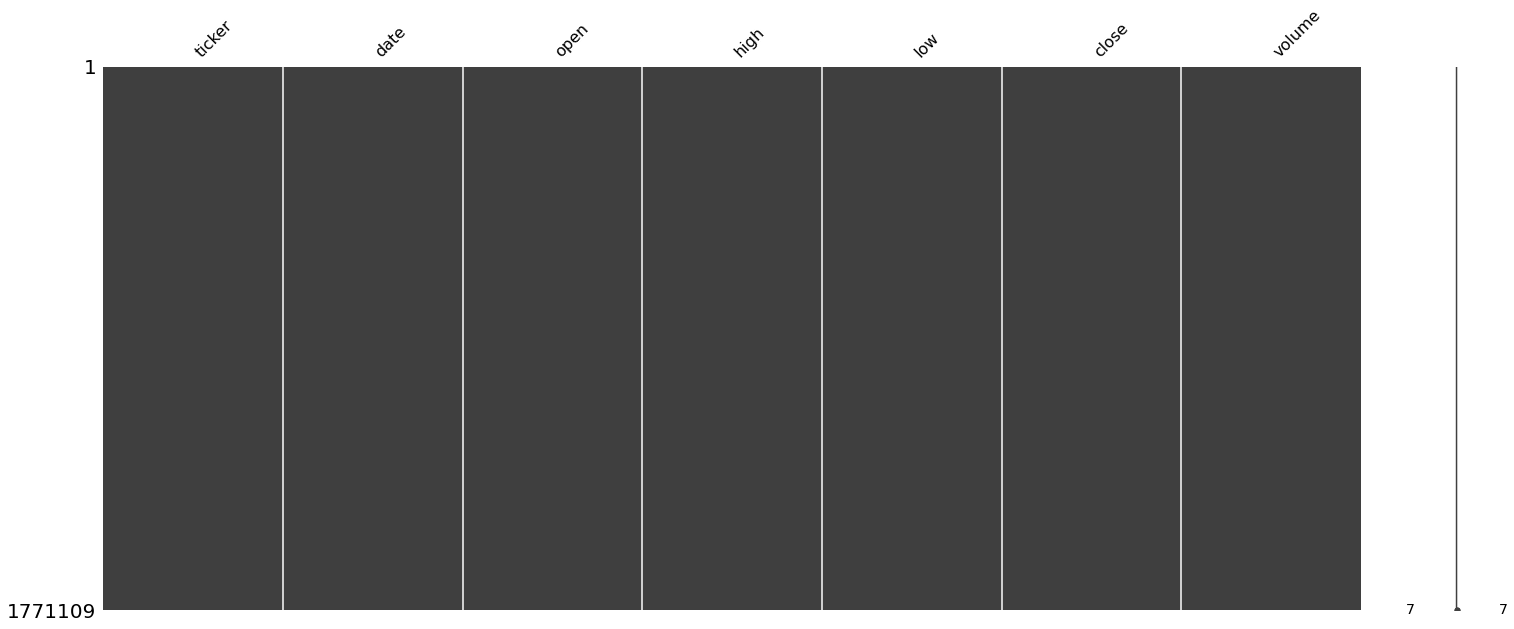

In [5]:
import missingno as msno
msno.matrix(df)

no non-numerical value,missing data might be zeroes where they dont make sense, to be handled when encountered.

ticker             a
date      2005-08-15
open           20.05
high          20.825
low           19.812
close         20.472
volume    32986983.0
Name: 155, dtype: object
ticker             aa
date       2009-03-19
open           12.131
high           14.072
low            11.965
close          13.362
volume    115961625.0
Name: 4298, dtype: object
ticker            aal
date       2015-03-20
open           53.761
high           54.598
low            53.438
close          54.317
volume    141430049.0
Name: 6798, dtype: object
ticker          aamc
date      2016-10-13
open            55.0
high         59.5012
low            39.37
close           41.2
volume      300450.0
Name: 8413, dtype: object
ticker          aame
date      2011-03-18
open          1.9539
high          1.9923
low           1.9539
close         1.9923
volume      234903.0
Name: 10005, dtype: object


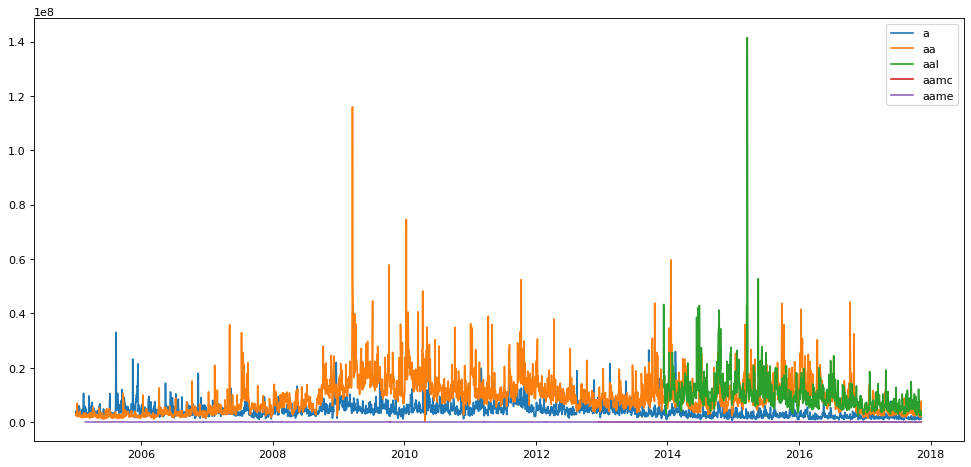

In [6]:
tickers=df.groupby('ticker')
from matplotlib.pyplot import figure

figure(figsize=(15, 7), dpi=80)
for i in list(tickers.groups.keys())[:5]:
    plt.plot(tickers.get_group(i)['date'],tickers.get_group(i)['volume'],label=i)
    print(tickers.get_group(i).iloc[tickers.get_group(i)['volume'].argmax()])
    plt.legend()

In [7]:
import numpy as np
ticker_means=tickers.agg(np.mean)
ticker_stds=tickers.agg(np.std)
ticker_medians=tickers.agg(np.median)

In [8]:
plyo.iplot(
    ticker_means['volume'].iplot(asFigure=True),
    image='png',
    filename='ply_01'
)

In [9]:
plyo.iplot(
    ticker_stds['close'].iplot(asFigure=True),
    image='png',
    filename='ply_02'
)

In [10]:
qf=cf.QuantFig(tickers.get_group('a')[-60:])
plyo.iplot(qf.iplot(asFigure=True),image='png',
          filename='qf_01')

In [11]:
qf.add_bollinger_bands(periods=15,boll_std=2)

plyo.iplot(qf.iplot(asFigure=True),image='png',
          filename='qf_04')

In [12]:
qf=cf.QuantFig(tickers.get_group('a')[-60:])
qf.add_sma([10,20],width=2,color=['green','lightgreen'],legendgroup=True)
plyo.iplot(qf.iplot(asFigure=True),image='png',
          filename='qf_04')

In [13]:
qf=cf.QuantFig(tickers.get_group('a')[-60:])
qf.add_rsi(periods=20,color='java')
plyo.iplot(qf.iplot(asFigure=True),image='png',
          filename='qf_04')

In [14]:
qf=cf.QuantFig(tickers.get_group('a')[-60:])


qf.add_bollinger_bands(periods=20,boll_std=2,colors=['magenta','grey'],fill=True)
plyo.iplot(qf.iplot(asFigure=True),image='png',
          filename='qf_04')

In [15]:
qf=cf.QuantFig(tickers.get_group('a')[-60:])
qf.add_cci()
plyo.iplot(qf.iplot(asFigure=True),image='png',filename='qf_04')

In [16]:
qf=cf.QuantFig(tickers.get_group('a')[-60:])
qf.add_ema()
plyo.iplot(qf.iplot(asFigure=True),image='png',filename='qf_04')

#### refer to :-https://jpoles1.github.io/cufflinks/html/cufflinks.quant_figure.html

In [17]:
!pip install ta

You should consider upgrading via the 'c:\users\chait\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


#### adding in the market cap

In [18]:
df['total traded']=df['open']*df['volume']

In [19]:
df.size

14168872

#### outlier removal

In [20]:
tickers=df.groupby('ticker')
temp=pd.DataFrame()
for i in list(tickers.groups.keys()):
    tic=tickers.get_group(i)
    ##outliers removed via percentile method
    max1=tic['open'].quantile(0.999)
    tic=tic[tic['open']<max1]
    min1=tic['open'].quantile(0.001)
    tic=tic[tic['open']>min1]
    
    max1=tic['high'].quantile(0.999)
    tic=tic[tic['high']<max1]
    min1=tic['high'].quantile(0.001)
    tic=tic[tic['high']>min1]
    
    max1=tic['low'].quantile(0.999)
    tic=tic[tic['low']<max1]
    min1=tic['low'].quantile(0.001)
    tic=tic[tic['low']>min1]
    
    max1=tic['close'].quantile(0.999)
    tic=tic[tic['close']<max1]
    min1=tic['close'].quantile(0.001)
    tic=tic[tic['close']>min1]
    
    max1=tic['volume'].quantile(0.999)
    tic=tic[tic['volume']<max1]
    min1=tic['volume'].quantile(0.001)
    tic=tic[tic['volume']>min1]
    
    ##outliers via iqr method
    iqr1=tic['open'].quantile(0.75)-tic['open'].quantile(0.25)
    tic=tic[tic['open']<tic['open'].quantile(0.75)+1.5*iqr1]
    tic=tic[tic['open']>tic['open'].quantile(0.25)-1.5*iqr1]
    
    iqr1=tic['high'].quantile(0.75)-tic['high'].quantile(0.25)
    tic=tic[tic['high']<tic['high'].quantile(0.75)+1.5*iqr1]
    tic=tic[tic['high']>tic['high'].quantile(0.25)-1.5*iqr1]
    
    iqr1=tic['low'].quantile(0.75)-tic['low'].quantile(0.25)
    tic=tic[tic['low']<tic['low'].quantile(0.75)+1.5*iqr1]
    tic=tic[tic['low']>tic['low'].quantile(0.25)-1.5*iqr1]
    
    iqr1=tic['close'].quantile(0.75)-tic['close'].quantile(0.25)
    tic=tic[tic['close']<tic['close'].quantile(0.75)+1.5*iqr1]
    tic=tic[tic['close']>tic['close'].quantile(0.25)-1.5*iqr1]
    
    iqr1=tic['volume'].quantile(0.75)-tic['volume'].quantile(0.25)
    tic=tic[tic['volume']<tic['volume'].quantile(0.75)+1.5*iqr1]
    tic=tic[tic['volume']>tic['volume'].quantile(0.25)-1.5*iqr1]
    
    temp=pd.concat([temp,tic])

In [21]:
df=temp
temp.size


12442784

#### making all these features that is all the indicators for all the tickers now

In [22]:
# working with df


from ta import add_all_ta_features
from ta.momentum import WilliamsRIndicator,UltimateOscillator,TSIIndicator,StochasticOscillator,StochRSIIndicator,RSIIndicator,ROCIndicator,AwesomeOscillatorIndicator,PercentageVolumeOscillator,PercentagePriceOscillator,KAMAIndicator
from ta.volume import VolumeWeightedAveragePrice,VolumePriceTrendIndicator,OnBalanceVolumeIndicator,NegativeVolumeIndexIndicator,MFIIndicator,ForceIndexIndicator,EaseOfMovementIndicator,ChaikinMoneyFlowIndicator,AccDistIndexIndicator
from ta.volatility import AverageTrueRange,BollingerBands,UlcerIndex
from ta.trend import ADXIndicator

In [23]:
tickers=df.groupby('ticker')
newdf=pd.DataFrame()
for i in list(tickers.groups.keys()):
    ticker_df=tickers.get_group(i)   
    
    ## 11 momentum indicators
    awe=AwesomeOscillatorIndicator(ticker_df['high'],ticker_df['low'])
    kama=KAMAIndicator(ticker_df['close'])
    ppo=PercentagePriceOscillator(ticker_df['close'])
    pvo=PercentageVolumeOscillator(ticker_df['volume'])
    roc=ROCIndicator(ticker_df['close'])
    rsi=RSIIndicator(ticker_df['close'])
    srsi=StochRSIIndicator(ticker_df['close'])
    so=StochasticOscillator(ticker_df['high'],ticker_df['low'],ticker_df['close'])
    tsi=TSIIndicator(ticker_df['close'])
    uo=UltimateOscillator(ticker_df['high'],ticker_df['low'],ticker_df['close'])
    wr=WilliamsRIndicator(ticker_df['high'],ticker_df['low'],ticker_df['close'])
    ## 9 volume indicators
    adi=AccDistIndexIndicator(ticker_df['high'],ticker_df['low'],ticker_df['close'],ticker_df['volume'])
    cmf=ChaikinMoneyFlowIndicator(ticker_df['high'],ticker_df['low'],ticker_df['close'],ticker_df['volume'])
    eom=EaseOfMovementIndicator(ticker_df['high'],ticker_df['low'],ticker_df['volume'])
    fi=ForceIndexIndicator(ticker_df['close'],ticker_df['volume'])
    mfi=MFIIndicator(ticker_df['high'],ticker_df['low'],ticker_df['close'],ticker_df['volume'])
    nvi=NegativeVolumeIndexIndicator(ticker_df['close'],ticker_df['volume'])
    obv=OnBalanceVolumeIndicator(ticker_df['close'],ticker_df['volume'])
    vpt=VolumePriceTrendIndicator(ticker_df['close'],ticker_df['volume'])
    vwa=VolumeWeightedAveragePrice(ticker_df['high'],ticker_df['low'],ticker_df['close'],ticker_df['volume'])
    ## volatility indicators
    #atr=AverageTrueRange(ticker_df['high'],ticker_df['low'],ticker_df['close'])
    bb=BollingerBands(ticker_df['close'])
    ui=UlcerIndex(ticker_df['close'])
    ## Trend Indicators.
    #adx=ADXIndicator(ticker_df['high'],ticker_df['low'],ticker_df['close'])
    
    ## 11 momentum indicators
    ticker_df['awesome']=awe.awesome_oscillator()
    ticker_df['kama']=kama.kama()
    ticker_df['ppo']=ppo.ppo()
    ticker_df['ppo hist']=ppo.ppo_hist()
    ticker_df['ppo signal']=ppo.ppo_signal()
    ticker_df['pvo']=pvo.pvo()
    ticker_df['pvo hist']=pvo.pvo_hist()
    ticker_df['pvo signal']=pvo.pvo_signal()
    ticker_df['roc']=roc.roc()
    ticker_df['rsi']=rsi.rsi()
    ticker_df['srsi']=srsi.stochrsi()
    ticker_df['srsi d']=srsi.stochrsi_d()
    ticker_df['srsi k']=srsi.stochrsi_k()
    ticker_df['so']=so.stoch()
    ticker_df['so signal']=so.stoch_signal()
    ticker_df['tsi']=tsi.tsi()
    ticker_df['uo']=uo.ultimate_oscillator()
    ticker_df['wr']=wr.williams_r()
    ## 9 volume indicators
    ticker_df['adi']=adi.acc_dist_index()
    ticker_df['cmf']=cmf.chaikin_money_flow()
    ticker_df['eom']=eom.ease_of_movement()
    ticker_df['eom signal']=eom.sma_ease_of_movement()
    ticker_df['fi']=fi.force_index()
    ticker_df['mfi']=mfi.money_flow_index()
    ticker_df['nvi']=nvi.negative_volume_index()
    ticker_df['obv']=obv.on_balance_volume()
    ticker_df['vpt']=vpt.volume_price_trend()
    ticker_df['vwa']=vwa.volume_weighted_average_price()
    ## volatility indicators
    #ticker_df['atr']=atr.average_true_range()
    ticker_df['bhb']=bb.bollinger_hband()
    ticker_df['bhbi']=bb.bollinger_hband_indicator()
    ticker_df['blb']=bb.bollinger_lband()
    ticker_df['blbi']=bb.bollinger_lband_indicator()
    ticker_df['bm']=bb.bollinger_mavg()
    ticker_df['bpb']=bb.bollinger_pband()
    ticker_df['bwb']=bb.bollinger_wband()
    ticker_df['ui']=ui.ulcer_index()
    #ticker_df['adx']=adx.adx()
    #ticker_df['adx pos']=adx.adx_pos()
   # ticker_df['adx neg']=adx.adx_neg()   
    
    newdf=pd.concat([newdf,ticker_df])

In [24]:
newdf.tail()

,ticker,date,open,high,low,close,volume,total traded,awesome,kama,...,vpt,vwa,bhb,bhbi,blb,blbi,bm,bpb,bwb,ui
1771098,clne,2017-10-27,2.30,2.33,2.27,2.29,1028467.0,2365474.10,-0.092831,2.364872,...,-12522.459023,2.363964,2.508991,0.0,2.277009,0.0,2.3930,0.056001,9.694223,5.410943
1771099,clne,2017-10-30,2.28,2.32,2.26,2.30,1269343.0,2894102.04,-0.098096,2.356868,...,-3361.493658,2.352811,2.489117,0.0,2.274883,0.0,2.3820,0.117240,8.993850,5.594720
1771100,clne,2017-10-31,2.35,2.40,2.30,2.35,879314.0,2066387.90,-0.096684,2.356810,...,24658.504272,2.347288,2.470656,0.0,2.279344,0.0,2.3750,0.369323,8.055211,5.615794
1771101,clne,2017-11-01,2.37,2.44,2.35,2.41,930360.0,2204953.20,-0.077346,2.359205,...,42869.394080,2.347014,2.467734,0.0,2.280266,0.0,2.3740,0.692033,7.896686,5.504276
1771102,clne,2017-11-02,2.42,2.43,2.35,2.39,755638.0,1828643.96,-0.059551,2.359903,...,17483.017569,2.347058,2.460612,0.0,2.282388,0.0,2.3715,0.603802,7.515268,5.359716


In [25]:
tickers=newdf.groupby('ticker')
len(list(tickers.groups.keys()))

769

https://technical-analysis-library-in-python.readthedocs.io/en/latest/index.html

feature selection

#### random forest importance

In [ ]:
newdf.to_csv('newdf.csv')

In [29]:
newdf=pd.read_csv('newdf.csv')

In [34]:
dummies=pd.get_dummies(newdf['ticker'])
merged=pd.concat([newdf,dummies],axis='columns')
merged=merged.drop(['ticker'],axis=1)

In [38]:
merged=merged.drop(['Unnamed: 0'],axis=1)

In [42]:
merged.tail()

,date,open,high,low,close,volume,total traded,awesome,kama,ppo,...,cldx,clf,clfd,clgx,clh,cli,clir,clm,clmt,clne
1771104,2017-11-06,2.08,2.12,2.07,2.10,2081824.0,4330193.92,-0.122669,2.290970,-2.438575,...,0,0,0,0,0,0,0,0,0,1
1771105,2017-11-07,2.10,2.14,2.01,2.07,1574224.0,3305870.40,-0.167228,2.264491,-3.004156,...,0,0,0,0,0,0,0,0,0,1
1771106,2017-11-08,2.07,2.12,2.05,2.10,1659151.0,3434442.57,-0.219471,2.250857,-3.316580,...,0,0,0,0,0,0,0,0,0,1
1771107,2017-11-09,2.08,2.12,2.05,2.11,1167644.0,2428699.52,-0.271059,2.241192,-3.493981,...,0,0,0,0,0,0,0,0,0,1
1771108,2017-11-10,2.08,2.12,2.07,2.10,895072.0,1861749.76,-0.257059,2.231997,-3.633965,...,0,0,0,0,0,0,0,0,0,1


In [41]:
##train test split
from sklearn.model_selection import train_test_split
xtrain,ytrain,xtest,ytest=train_test_split(merged.drop(['close'], axis=1),newdf['close'])

MemoryError: Unable to allocate 1.28 GiB for an array with shape (776, 1771109) and data type uint8

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rnd=RandomForestRegressor(n_estimators=500,n_jobs=-1)
rnd.fit(xtrain,ytrain)

In [ ]:
for name,score in zip()